# Chapter 8: Numerical Methods

In [1]:
import numpy as np

In [2]:
from IPython.display import Image

## 8.1 Roots of Algebraic and Transcendental Equations

### 8.1.1 Bisection Method

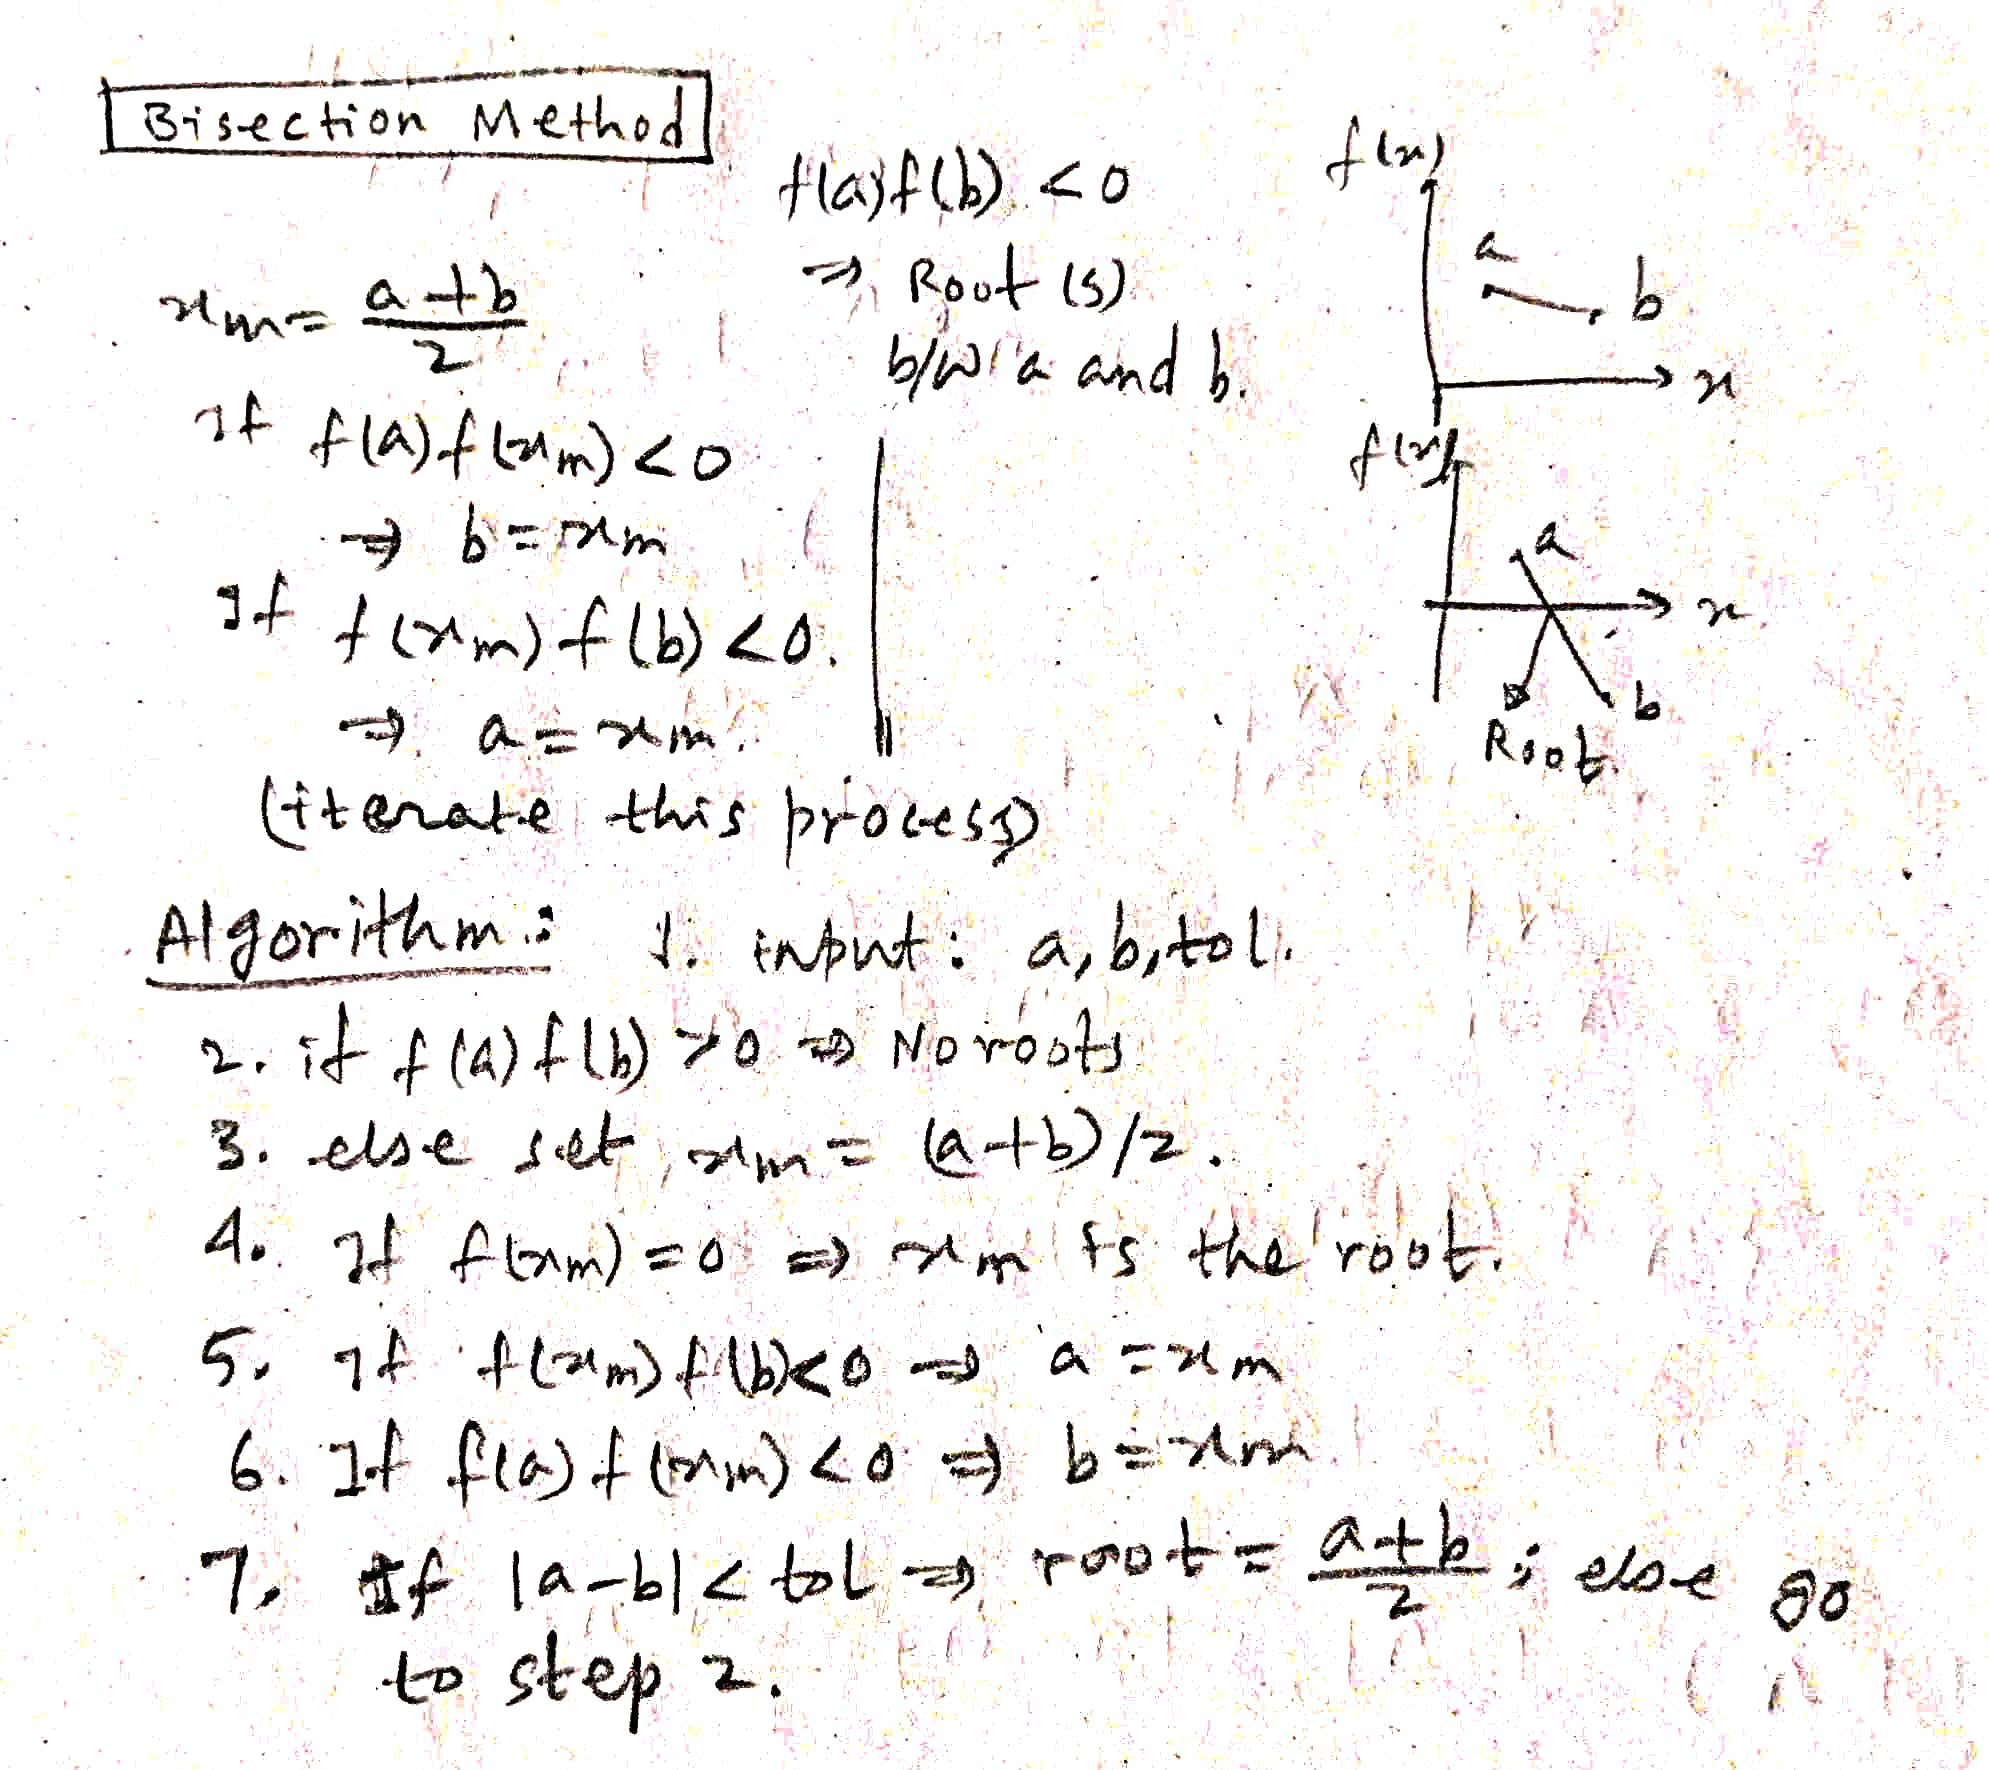

In [3]:
Image('notes/AKG_Ch8_1.jpg')

**Algorithm**

1. Input: $f(x)$, $a, b, tol$
2. if $f(a)*f(b)>0$: no root.
3. else set $x_m = (a+b)/2$
4. if $f(x_m) = 0$: $x_m$ is the root.
5. if $f(a)*f(x_m)<0$: set $b=x_m$.
6. if $f(x_m)*f(b)<0$: set $a=x_m$.
7. if $|b-a| < tol$: stop.

8. the root is $(a+b)/2$.

In [4]:
fx = lambda x: x**3 -2*x -5
a, b, tol = 1, 5, 1e-5  # input

if fx(a)*fx(b) > 0:
    print('No root in this interval.')
else:
    while abs(b-a) >= tol:
        xm = (a+ b)/2
        if fx(xm) == 0:
            print(f'root = {xm}')
        elif fx(a)*fx(xm) <0:
            b = xm
        elif fx(xm)*fx(b) <0:
            a = xm
        else:
            break
    print(f'root = {(a+b)/2}')

def bisection_root_finding(fx, a, b, tol):
    if fx(a)*fx(b) > 0:
        print('No root in this interval.')
    else:
        while abs(b-a) >= tol:
            xm = (a+ b)/2
            if fx(xm) == 0:
                print(f'root = {xm}')
            elif fx(a)*fx(xm) <0:
                b = xm
            elif fx(xm)*fx(b) <0:
                a = xm
            else:
                break
        return (a+b)/2
bisection_root_finding(fx, 1, 5, 1e-4)

root = 2.094554901123047


2.094573974609375

### 8.1.2 Secant Method

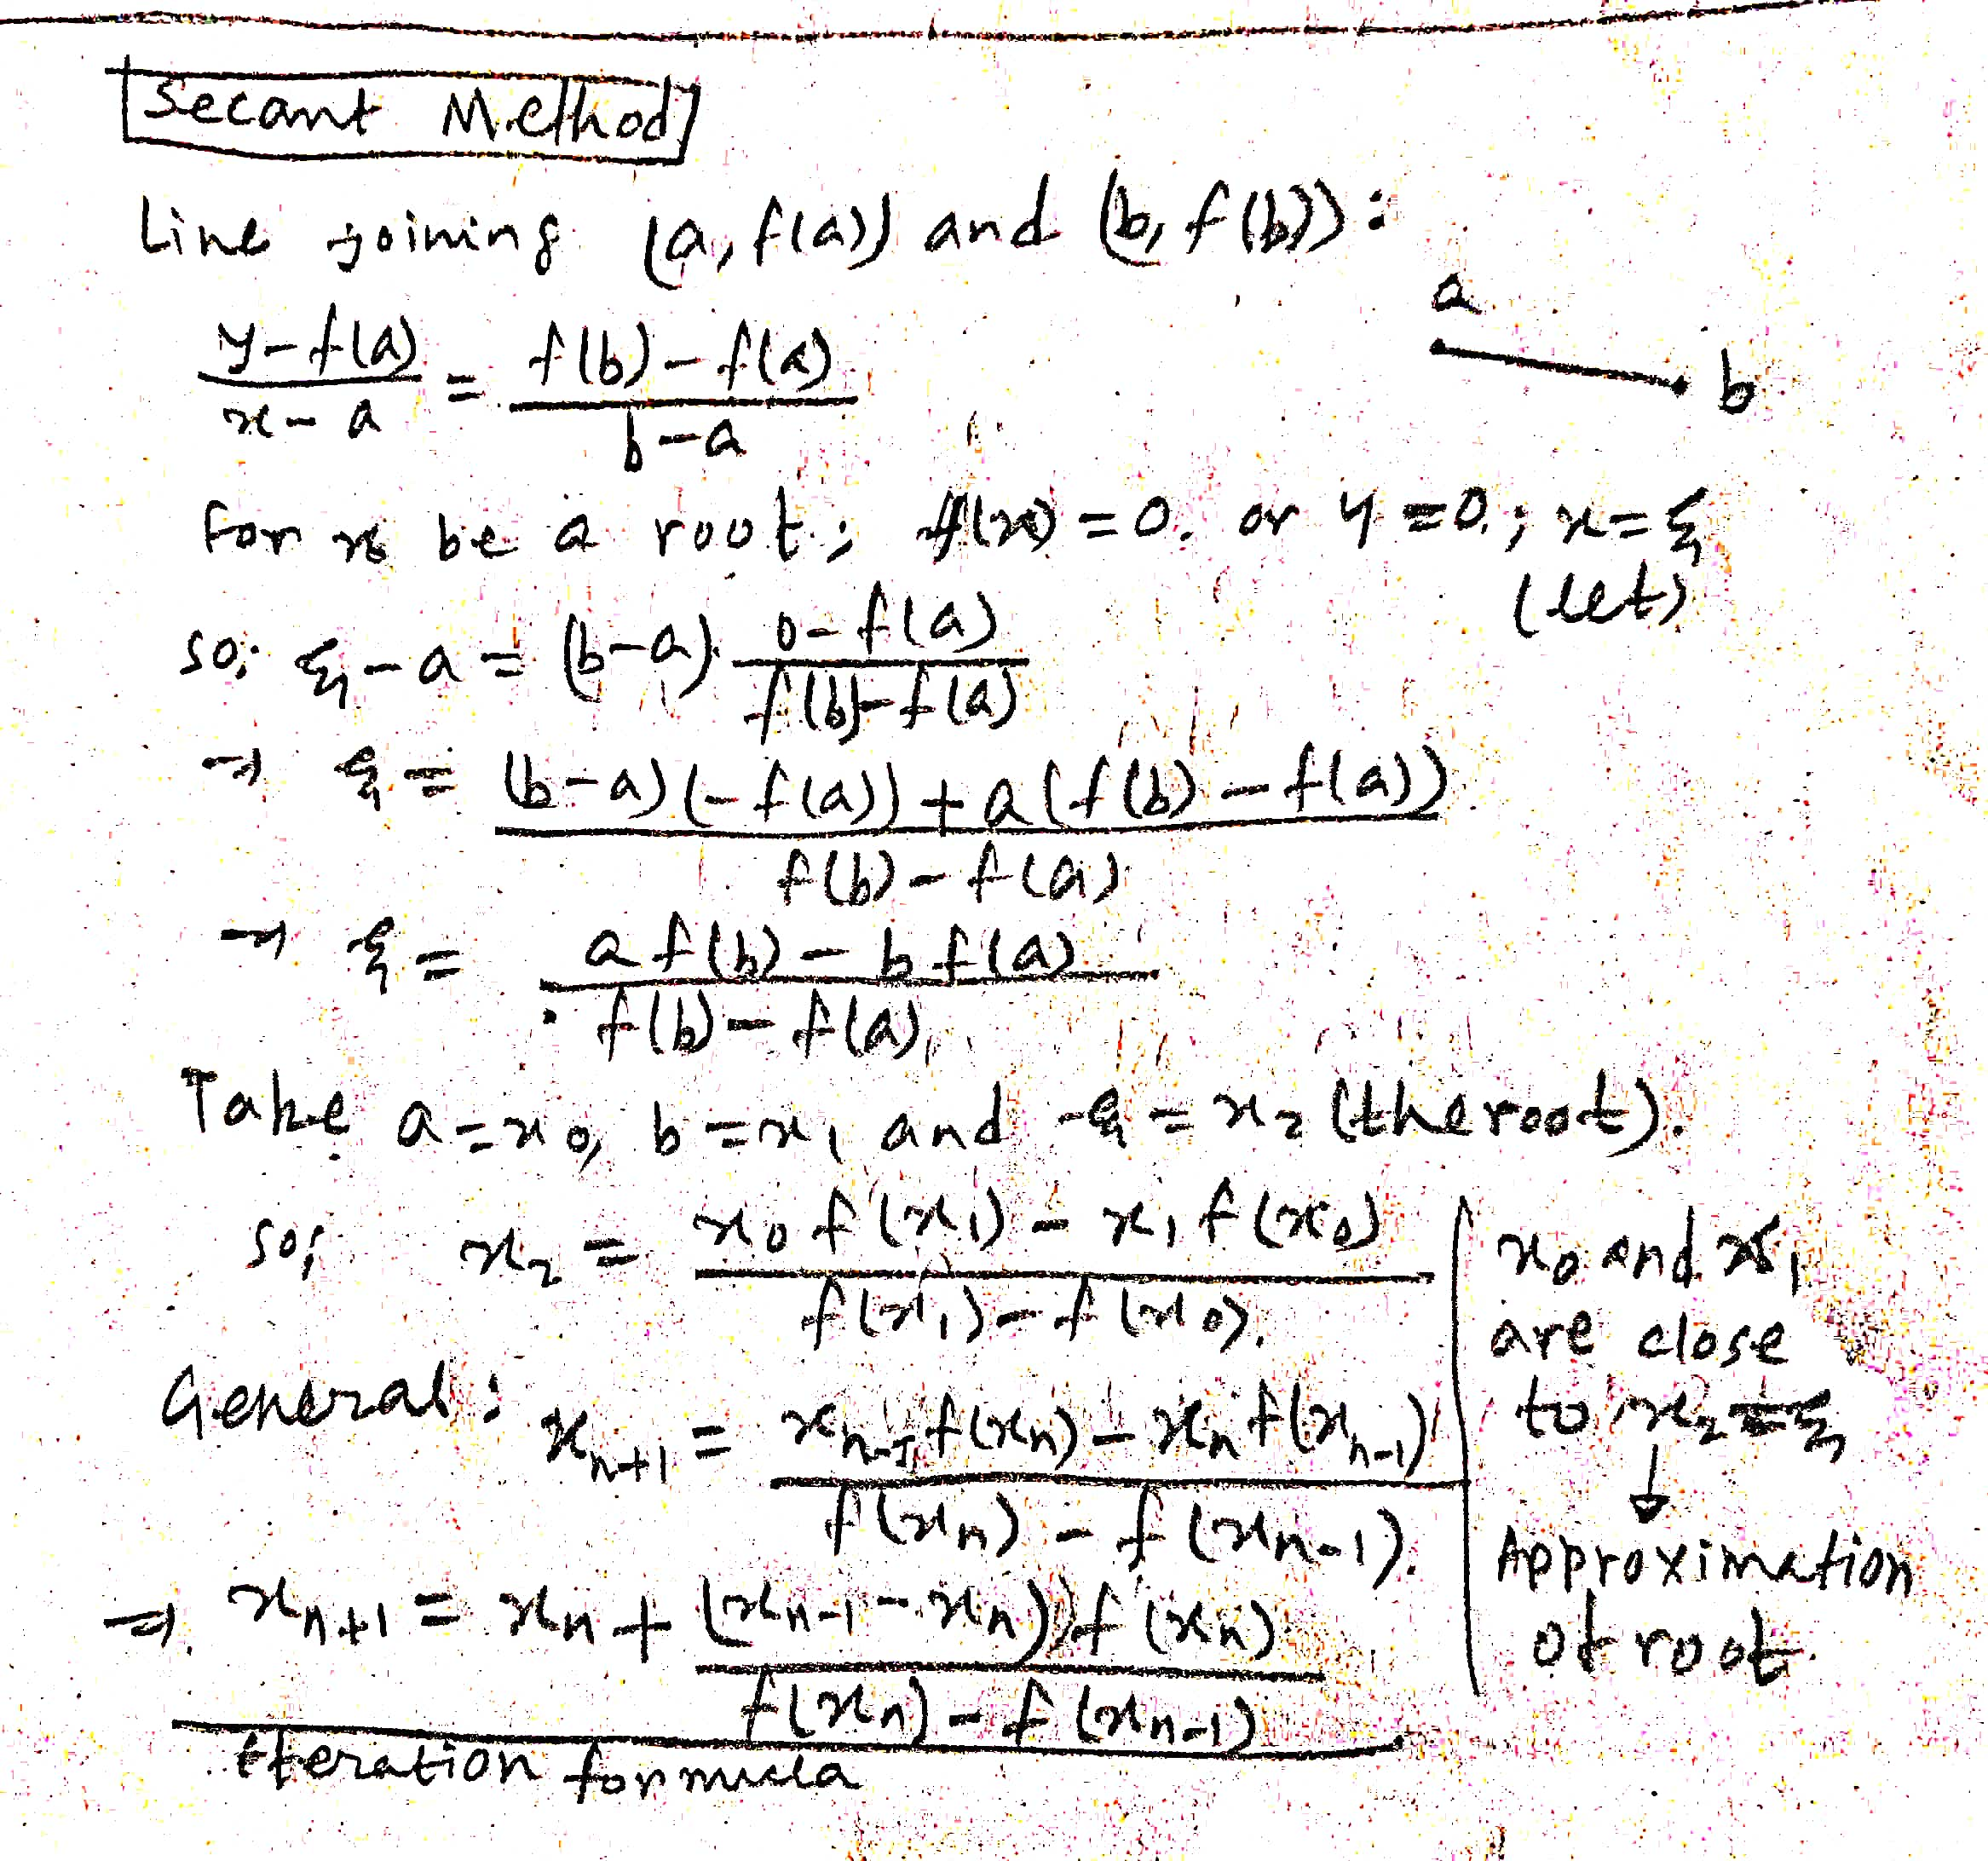

In [5]:
Image('notes/AKG_Ch8_2.jpg')

**Algorithm**

1. define function $f(x)$
2. input: $x_0, x_1, tol$
3. evaluate: $f(x_0), f(x_1)$ and store.
4. calculate $x_2$ from recursion relation.
5. update $x_0, x_1$, functions for the next step.

6. continue steps 4 and 5 until $|f(x)|>tol$ (or, $x_1-x_0|>tol$).

In [6]:
fx = lambda x: x**3 -2*x -5
x0, x1, tol = 2, 5, 1e-4   # input
fx0, fx1 = fx(x0), fx(x1)

while np.abs(fx1) >= tol:
    x2 = x1 - fx1*(x1-x0)/(fx1-fx0)
    x0, x1 = x1, x2
    fx0, fx1 = fx1, fx(x2)
    print(f'x = {x1} \t f(x) = {fx1}')

print(f'\n\t Root = {x1}')

x = 2.027027027027027 	 f(x) = -0.7253272264229143
x = 2.04650204954204 	 f(x) = -0.5219043029894852
x = 2.0964674019214566 	 f(x) = 0.021407498763649002
x = 2.094498673806521 	 f(x) = -0.0005893927318618708
x = 2.094551424625526 	 f(x) = -6.352733059600268e-07

	 Root = 2.094551424625526


The above code doesn't works when no root exists.

In [7]:
fx = lambda x: x**2 +2
x0, x1, tol = 2, 5, 1e-4   # input
fx0, fx1 = fx(x0), fx(x1)

imax = 100   # maximum iteration
i = 0
while np.abs(x1-x0) >= tol:
    x2 = x1 - fx1*(x1-x0)/(fx1-fx0)
    x0, x1 = x1, x2
    fx0, fx1 = fx1, fx(x2)
    i = i+1
    print(f'iteration {i} \t x = {x1} \t f(x) = {fx1}')
    if i == imax:
        print('No root')
        break
print(f'\n\t Root = {x1}')

def secant_root_finding(fx, x0, x1, tol, max_iter):
    imax = max_iter
    fx0, fx1 = fx(x0), fx(x1)
    i = 0
    while np.abs(x1-x0) >= tol:
        x2 = x1 - fx1*(x1-x0)/(fx1-fx0)
        x0, x1 = x1, x2
        fx0, fx1 = fx1, fx(x2)
        i = i+1
        # print(f'iteration {i} \t x = {x1} \t f(x) = {fx1}')
        if i == imax:
            print('No root')
            break
    return x1
secant_root_finding(fx, 2, 5, 1e-4, 100)

iteration 1 	 x = 1.1428571428571428 	 f(x) = 3.3061224489795915
iteration 2 	 x = 0.6046511627906976 	 f(x) = 2.3656030286641427
iteration 3 	 x = -0.7490494296577952 	 f(x) = 2.561075048070668
iteration 4 	 x = 16.987140232700504 	 f(x) = 290.56293328543217
iteration 5 	 x = -0.9067696369860343 	 f(x) = 2.8222311745597843
iteration 6 	 x = -1.0822774810224105 	 f(x) = 3.171324545928214
iteration 7 	 x = 0.5121163959328714 	 f(x) = 2.2622632029832737
iteration 8 	 x = 4.479877897277714 	 f(x) = 22.069305974517388
iteration 9 	 x = 0.05893815290881754 	 f(x) = 2.003473705868303
iteration 10 	 x = -0.3824707263485752 	 f(x) = 2.1462838565136066
iteration 11 	 x = 6.251432727929875 	 f(x) = 41.080411151832756
iteration 12 	 x = -0.748171485006635 	 f(x) = 2.5597605709770335
iteration 13 	 x = -1.213306694473328 	 f(x) = 3.4721131348537932
iteration 14 	 x = 0.5568445981473928 	 f(x) = 2.3100759064859315
iteration 15 	 x = 4.075822951071176 	 f(x) = 18.61233272847855
iteration 16 	 x = 0.

0.84008556318269

### 8.1.3 Newton-Raphson Method

**Algorithm:**

1. input: $f(x), f'(x), a, tol$.

2. Calculate $\frac{f(x)}{f'(x)}$ and update $x$ until $|f(x)|>tol$.

In [8]:
fx = lambda x: x**3 -2*x +5
fpx = lambda x: 3*x**2 -2

x, tol = 3, 1e-4    # input

while np.abs(fx(x)) >= tol:
    x = x - fx(x)/ fpx(x)
    print(f'x = {x}')

print(f'\nRoot = {x}')

def Newton_Raphson_root_finding(fx, fx_derivative, x, tol):
    fpx = fx_derivative
    while np.abs(fx(x)) >= tol:
        x = x - fx(x)/ fpx(x)
    # print(f'Root = {x}')
    return x
Newton_Raphson_root_finding(fx, fpx, 5, 1e-4)

x = 1.96
x = 1.056092726356459
x = -1.9645030165199775
x = -2.105187939287363
x = -2.0946146311468476
x = -2.0945514837873005

Root = -2.0945514837873005


-2.0945525944736683

Comparison

In [9]:
fx = lambda x: x**3 -2*x -5

In [10]:
%timeit bisection_root_finding(fx, 1, 5, 1e-4)

26.4 µs ± 3.77 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit secant_root_finding(fx, 1, 5, 1e-4, 100)

18.6 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit Newton_Raphson_root_finding(fx, fpx, 5, 1e-4)

15.9 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### 8.1.4 System of Equations

### Exercises

## 8.2 Interpolation by Finite Differences Method

### 8.2.1 Forward Differences

### 8.2.2 Interpolation with forward differences

## 8.3 Differentiation

Working foumula:
$$ f'(x_0) = \frac{1}{h} \left(\Delta y_0 -\frac{\Delta^2y_0}{2} +\frac{\Delta^3y_0}{3} -\frac{\Delta^4y_0}{4} + \dots \right) $$
Here, $x_0$ is the initial point of a given dataset.

In [13]:
x = [2,4,6,8,10]
y = [10,12.5,16,21.8,32.4]
h = 2
sm = 0
k = 0
for i in range(len(y),1,-1):
    y = np.diff(y)
    sm += (-1)**k *y[0]/(k+1)
    k += 1
yp = sm/h
print(f'1st derivative = {yp}.')

def forward_diff_derivative(x, fx, dx):
    y, h = fx, dx
    sm = 0
    k = 0
    for i in range(len(y),1,-1):
        y = np.diff(y)
        sm += (-1)**k *y[0]/(k+1)
        k += 1
    return sm/h

1st derivative = 1.0666666666666673.


Problem

In [14]:
x = [0.05,0.1,0.15,0.2,0.25,0.35,0.4,0.45]
y = [0.95,0.86,0.82,0.78,0.7,0.67,0.61,0.58]

# print(forward_diff_derivative(x,y,0.05)
# ,forward_diff_derivative([0.05,0.1,0.15,0.2,0.25], [0.95,0.86,0.82,0.78,0.7],0.5)
# ,forward_diff_derivative([0.2,0.25],[0.78,0.7],0.05)
# )

## 8.4 Integration
$$ I = \int_a^b f(x) \,dx $$

Composite trapizoidal method:
$$ I = h \left(\frac{y_0+y_n}{2} +y_1 +y_2 +\dots +y_{n-1} \right) $$

In [15]:
fx = lambda x: x**2     # input
a, b, n = 2, 4, 100     # input

h = (b-a)/n
sm = (fx(a) +fx(b))/2
for i in range(1, n):
    x = a + i*h
    sm += fx(x)
I = h*sm
print(f'Value of integral = {I}.')

Value of integral = 18.66680000000001.


Composite Simpson's method:
$$ I = \frac{h}{3} \left[ y_0 + 4(y_1+y_3+ \dots +y_{n-1}) + 2(y_2+y_4+\dots+y_{n-2}) +y_n \right] $$

In [16]:
fx = lambda x: x**2
a, b, n = 2, 4, 100

h = (b-a)/n
d = 4
sm = fx(a) + fx(b)
for k in range(1,n):
    x = a + k*h
    sm += d*fx(x)
    d = 6-d
I = (h/3) * sm
print(f'Value of integral = {I}.')

Value of integral = 18.666666666666675.


In [17]:
fx = lambda x: x**2
a, b, n = 2, 4, 100  # input

h = (b-a)/n
x1 = np.arange(a+h, b, 2*h)
x2 = np.arange(a+2*h, b, 2*h)
I = (h/3) * (fx(a) + 4*np.sum(fx(x1)) + 2*np.sum(fx(x1)) + fx(b))
print(f'Value of integral = {I}.')  # why different?

Value of integral = 18.799733333333343.


### Exercises

## 8.5 Ordinary Differential Equations (ODE)

Euler Method

RK2 method

RK4 method

## 8.6 Solving System of Linear Equations